In [1]:
from prophet import Prophet
import pandas as pd

In [2]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\dress-us-123.xlsx")


In [3]:
d

,start_date,full_stock_index,fsi-smooth,new_season_index,nsi-smooth,freshness_index,markdown_index,fashion_leaders_index,new_season_index_raw,trending_index,...,trend,base,fsi_yhat_lower,fsi_yhat,fsi_yhat_upper,fsi_pivot_points,nsi_yhat_lower,nsi_yhat,nsi_yhat_upper,nsi_pivot_points
0,2016-01-04,0.243511,NaN,0.247658,NaN,-0.067060,1.032270,0.638015,0.280319,1.037972,...,dresses_super_us,Apparel,0.235089,0.241515,0.248030,['2016-01-11'],0.219324,0.237258,0.255687,['2016-01-11']
1,2016-01-11,0.244308,NaN,0.250639,NaN,-0.039865,1.030113,0.632674,0.240801,1.045835,...,dresses_super_us,Apparel,0.236926,0.243643,0.250668,['2016-01-11'],0.220494,0.240519,0.259738,['2016-01-11']
2,2016-01-18,0.243003,0.243607,0.253476,0.250591,-0.010889,1.028061,0.627592,0.255629,1.053102,...,dresses_super_us,Apparel,0.238383,0.245132,0.252257,['2016-01-11'],0.225828,0.243704,0.261544,['2016-01-11']
3,2016-01-25,0.243759,0.243690,0.256164,0.253426,0.019869,1.026115,0.622769,0.266188,1.059771,...,dresses_super_us,Apparel,0.239388,0.246139,0.253358,['2016-01-11'],0.228717,0.247138,0.267417,['2016-01-11']
4,2016-02-01,0.243069,0.243277,0.258698,0.256113,0.052408,1.024275,0.618205,0.230577,1.065843,...,dresses_super_us,Apparel,0.240367,0.246813,0.253589,['2016-01-11'],0.232023,0.251007,0.270083,['2016-01-11']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2021-06-28,0.173238,0.169050,0.200343,0.201038,0.561821,1.060215,0.608627,0.200555,1.196542,...,dresses_super_us,Apparel,0.163763,0.170646,0.177649,['2016-01-11'],0.173083,0.193007,0.212667,['2016-01-11']
287,2021-07-05,0.169872,0.170322,0.199288,0.200252,0.557008,1.057774,0.614471,0.189920,1.190738,...,dresses_super_us,Apparel,0.162784,0.170090,0.176560,['2016-01-11'],0.170779,0.188797,0.207043,['2016-01-11']
288,2021-07-12,0.167848,0.170319,0.197944,0.199192,0.550134,1.055271,0.620614,0.189398,1.183354,...,dresses_super_us,Apparel,0.162253,0.169338,0.176175,['2016-01-11'],0.163673,0.184245,0.204061,['2016-01-11']
289,2021-07-19,0.159270,0.165663,0.196295,0.197842,0.541198,1.052704,0.627054,0.158030,1.174388,...,dresses_super_us,Apparel,0.161664,0.168410,0.174916,['2016-01-11'],0.161498,0.179395,0.198588,['2016-01-11']


In [4]:
d=d.iloc[:, [0,1]]

In [5]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [6]:
df

,ds,y
0,2016-01-04,0.243511
1,2016-01-11,0.244308
2,2016-01-18,0.243003
3,2016-01-25,0.243759
4,2016-02-01,0.243069
...,...,...
286,2021-06-28,0.173238
287,2021-07-05,0.169872
288,2021-07-12,0.167848
289,2021-07-19,0.159270


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


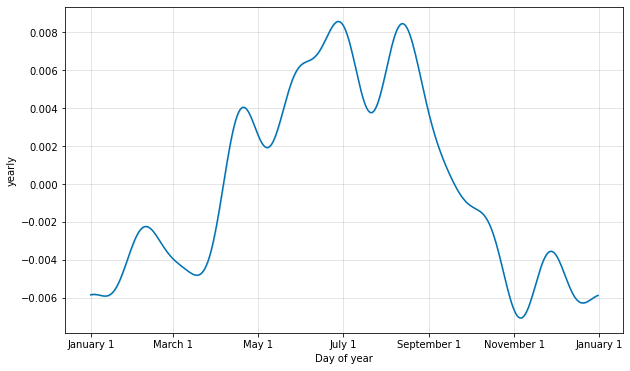

In [7]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


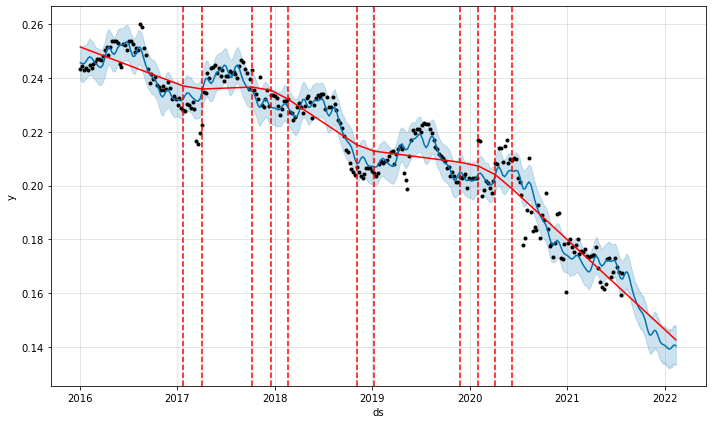

In [65]:
from prophet.plot import add_changepoints_to_plot
m = Prophet()
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=200)
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


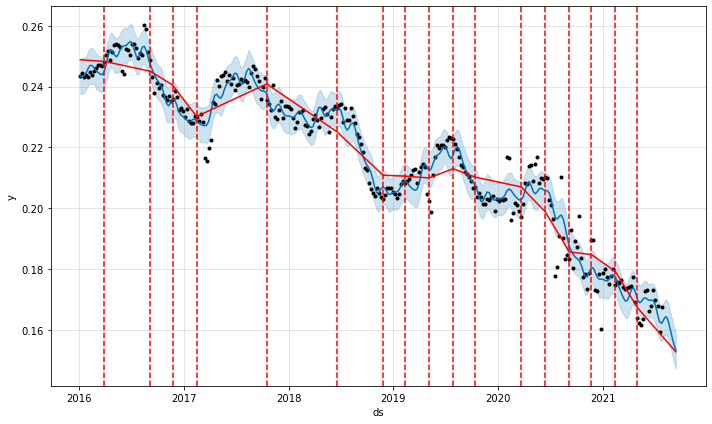

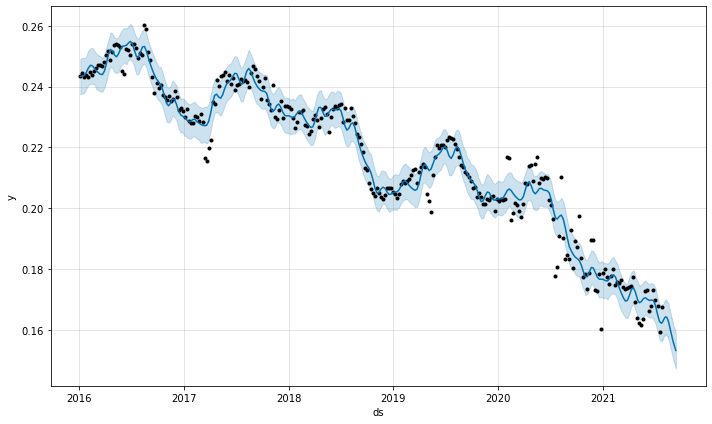

In [64]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.5, growth='linear')
# define the model
# fit the model
m.fit(df)

future = m.make_future_dataframe(periods=50)
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig = m.plot(fcst)

In [17]:
fcst.to_csv(r'C:\Users\prernagupta\Desktop\jeans-lin.csv')

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




In [41]:
fcst.to_csv(r'C:\Users\prernagupta\Desktop\us-forecast-updated.csv')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


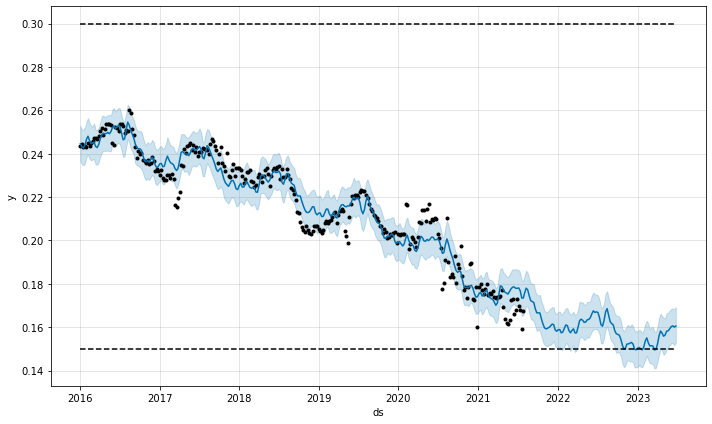

In [9]:
#logitsic, caps floors 
df['cap'] = 0.3
df['floor']=0.15
future = m.make_future_dataframe(periods=100, freq='W')
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.1, growth='logistic')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# define the model
# fit the model
m.fit(df)
q=m.predict(df)

future['cap'] = 0.3
future['floor']=0.15

fcst = m.predict(future)
fig = m.plot(fcst)

In [10]:
fcst.to_csv(r'C:\Users\prernagupta\Desktop\us-dress-forecast-wekly-v1.csv')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


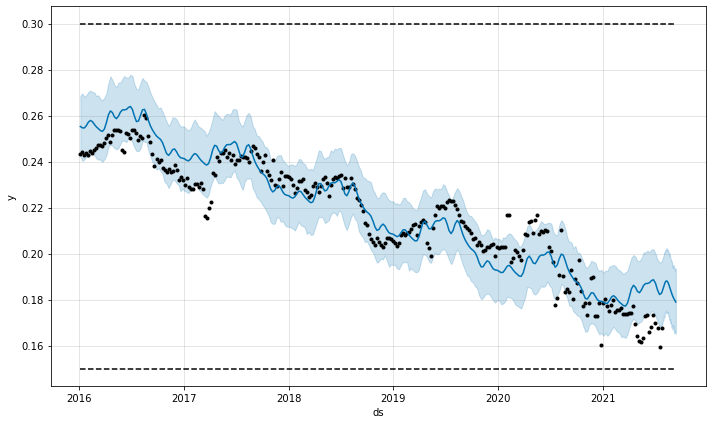

In [49]:
#logitsic, caps floors 

m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.001, growth='logistic')
# define the model
# fit the model
m.fit(df)
q=m.predict(df)
future = m.make_future_dataframe(periods=50)
future['cap'] = 0.3
future['floor']=0.15

fcst = m.predict(future)
fig = m.plot(fcst)

In [76]:
fcst.to_csv(r'C:\Users\prernagupta\Desktop\us-forecast-updatedve3.csv')

In [23]:
fcst.to_csv(r'C:\Users\prernagupta\Desktop\prophet8.csv')

In [22]:
future

,ds,cap,floor
0,2016-01-04,0.25,0.2
1,2016-01-11,0.25,0.2
2,2016-01-18,0.25,0.2
3,2016-01-25,0.25,0.2
4,2016-02-01,0.25,0.2
...,...,...,...
335,2021-09-03,0.25,0.2
336,2021-09-04,0.25,0.2
337,2021-09-05,0.25,0.2
338,2021-09-06,0.25,0.2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


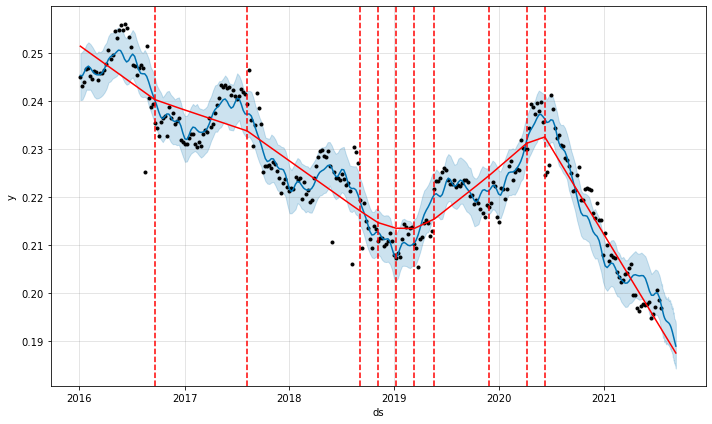

In [34]:
from prophet.plot import add_changepoints_to_plot



m = Prophet()
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=50)

fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

In [64]:

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
q

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,0.248555,0.4,0.17,0.232350,0.253714,0.248555,0.248555,-0.005997,-0.005997,-0.005997,-0.005997,-0.005997,-0.005997,0.0,0.0,0.0,0.242558
1,2016-01-11,0.248345,0.4,0.17,0.232651,0.253040,0.248345,0.248345,-0.005741,-0.005741,-0.005741,-0.005741,-0.005741,-0.005741,0.0,0.0,0.0,0.242604
2,2016-01-18,0.248135,0.4,0.17,0.233042,0.253358,0.248135,0.248135,-0.004628,-0.004628,-0.004628,-0.004628,-0.004628,-0.004628,0.0,0.0,0.0,0.243507
3,2016-01-25,0.247926,0.4,0.17,0.234615,0.254740,0.247926,0.247926,-0.003440,-0.003440,-0.003440,-0.003440,-0.003440,-0.003440,0.0,0.0,0.0,0.244486
4,2016-02-01,0.247717,0.4,0.17,0.234429,0.256158,0.247717,0.247717,-0.002881,-0.002881,-0.002881,-0.002881,-0.002881,-0.002881,0.0,0.0,0.0,0.244835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2021-06-21,0.211354,0.4,0.17,0.204593,0.225147,0.211354,0.211354,0.003495,0.003495,0.003495,0.003495,0.003495,0.003495,0.0,0.0,0.0,0.214849
286,2021-06-28,0.211276,0.4,0.17,0.205521,0.225555,0.211276,0.211276,0.004216,0.004216,0.004216,0.004216,0.004216,0.004216,0.0,0.0,0.0,0.215492
287,2021-07-05,0.211198,0.4,0.17,0.205467,0.225956,0.211198,0.211198,0.004538,0.004538,0.004538,0.004538,0.004538,0.004538,0.0,0.0,0.0,0.215737
288,2021-07-12,0.211120,0.4,0.17,0.204795,0.225399,0.211120,0.211120,0.004363,0.004363,0.004363,0.004363,0.004363,0.004363,0.0,0.0,0.0,0.215483


In [71]:
mean_absolute_percentage_error(p, q['yhat'])

2.721054605570759

In [70]:
p=d['Y']